# *CIA 3: Creating Browser in Python Using PyQt5*

<br>*Name*: **Saumyadeep Mitra**

*Reg No*: **21112023**

*Class*: **2BSC Data Science**
<hr/>

***The assignment titled*** **"Make Anything Using Python as part of CIA"** ***will be a culmination<br>
of whatever we have done throughout the semester. It can include anything<br>
that can be implemented through python programming.***
***Programmers
<br>
<br>
◆Defined a user-defined class that can be used to create the browser window 
<br>[we inherited the QMainWindow class of PyQt5 using super to inherit everything].
<br>
<br>◆Calling the methods/functions defined in various libraries of Python from our class (or user-defined functions), and
creating action, urlbar, navigation menu, toolbar, buttons and essential features for the same 
<br>
Adding stylesheet & icons to the buttons/menus/toolbar/window title to decorate the GUI window/mainwindow
<br>
<br>◆Demonstrated the working of browser in various cases(diff Search Engine,searches)***

In [1]:
"This Browser is Created using Pyqt5"

from PyQt5.QtWidgets import * #With a asterik at the end we can import everthing

from PyQt5.QtWebEngineWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *

import os
import sys

class Browser(QMainWindow):#Creating Class For Main Window
    def __init__(self, *args, **kwargs):
        super(Browser, self).__init__( *args, **kwargs) #Using args and kwarg as we dont know the number of arguments
                                                        #we need to pass
            
        self.window = QWidget()
        self.window.setWindowTitle("MY_BROWSER")
        self.layout = QVBoxLayout()
        self.horizontal = QHBoxLayout()
        
        #Adding Tabs under progress
        self.tabs = QTabWidget() 
        self.tabs.setDocumentMode(True)
        self.tabs.setTabsClosable(True)
        self.setCentralWidget(self.tabs)
        
        
        #ADDING A DOUBLE CLICK EVENT LISTNER
        self.tabs.tabBarDoubleClicked.connect(self.tab_open_doubleclick)
        
        #ADDING A TAB CLOSE EVENT LISTENER
        self.tabs.tabCloseRequested.connect(self.close_current_tab)
        
        #ADDING ACTIVE TAB CHANGE EVENT LISTENER
        self.tabs.currentChanged.connect(self.current_tab_changed)
        
        #Navigation Bar
        navtb = QToolBar('Navigation')
        navtb.setIconSize(QSize(27, 27))
        self.addToolBar(navtb)
        
        #Back Button
        back_btn = QAction(QIcon(os.path.join('icons', 'back.png')), "Back", self)
        back_btn.setStatusTip("Go Back To Previous Page")
        navtb.addAction(back_btn)
        #NAVIGATE TO PREVIOUS WEB PAGE BUTTON
        back_btn.triggered.connect(lambda: self.tabs.currentWidget().back())
        
        
        #Forward Button
        next_btn = QAction(QIcon(os.path.join('icons', 'forward.png')), "Forward", self)
        next_btn.setStatusTip("Go To Next Page")
        navtb.addAction(next_btn)
        #NAVIGATE TO NEXT WEB PAGE BUTTON
        next_btn.triggered.connect(lambda: self.tabs.currentWidget().forward())
        
        
        #Reload Button
        reload_btn = QAction(QIcon(os.path.join('icons', 'reload.png')), "Reload", self)
        reload_btn.setStatusTip("Reload the Page")
        navtb.addAction(reload_btn)
        #REFRESH THE WEB PAGE
        reload_btn.triggered.connect(lambda: self.tabs.currentWidget().reload())
        
        
        
        #Home Button
        home_btn = QAction(QIcon(os.path.join('icons', 'home.png')), "Home", self)
        home_btn.setStatusTip("Go to Page Home Page")
        navtb.addAction(home_btn)
        #NAVIGATE TO DEFAULT WEB PAGE BUTTON
        home_btn.triggered.connect(self.navigate_home)
        
        #Adding separator to The Navigation Button
        navtb.addSeparator()
        
        
        
        
        #ADDING LINE TO DISPLAY AND EDIT URL Bar
        self.urlbar = QLineEdit()
        navtb.addWidget(self.urlbar)
        
        #LOAD URL WHEN THE BUTTON IS PRESSED
        self.urlbar.returnPressed.connect(self.navigate_to_url)
        
        navtb.addSeparator() #Adding separator between Url and https status Icon
        
        #Label for SSL status of the URL
        self.httpsicon = QLabel()
        self.httpsicon.setPixmap(QPixmap(os.path.join('icon', 'aa')))
        navtb.addWidget(self.httpsicon)
        
        #ADDING STOP BUTTON TO STOP URL LOADING
        stop_btn = QAction(QIcon(os.path.join('icons', "stop2.png")), "Stop", self)
        stop_btn.setStatusTip("Stop Loading the Current Page")
        navtb.addAction(stop_btn)
        #STOP URL LOADING
        stop_btn.triggered.connect(lambda: self.tabs.currentWidget().stop())
        
        
        
        
        
        #ADD Top Menu Bar
        ##File Menu
        file_menu = self.menuBar().addMenu("&Options")
        ########ADDing File Action
        new_tab_action = QAction(QIcon(os.path.join('icons', 'newtab3.png')), "New Tab", self)
        new_tab_action.setStatusTip("Open a new tab")
        file_menu.addAction(new_tab_action)
        
        back_btn = QAction(QIcon(os.path.join('icons', 'back.png')), "Back", self)
        back_btn.setStatusTip("Go Back To Previous Page")
        file_menu.addAction(back_btn)
        
        ###########ADD NEW TAB
        new_tab_action.triggered.connect(lambda : self.add_new_tab())
        
        
        
        ##ADD Help Menu
        help_menu = self.menuBar().addMenu("&About")
        ######Adding Help action 
        navigate_home_action = QAction(QIcon(os.path.join('icons', 'home.png')), "Homepage", self)
        navigate_home_action.setStatusTip("Go To the HomepAGE")
        help_menu.addAction(navigate_home_action)
        ########### NAVIGATE TO HOME WEB PAGE
        navigate_home_action.triggered.connect(self.navigate_home)
        
        
        
        # Window Title & Icon
        self.setWindowTitle("Me Browser")
        self.setWindowIcon(QIcon(os.path.join('icons',"me_browsericon.png"))) 
        
        # ADDing stylesheet to customize the window(LIGHT-O-MODE)
        self.setStyleSheet("""QWidget{
            background-color: rgb(255, 163, 26);
            color: rgb(0, 0, 0);
        }
        QTabWidget::pane { /* The tab widget frame */
            border-top 2px solid rgb(255, 214, 153);
            position absolute;
            top: -0.5em;
            color: rgb(0, 0, 0);
            padding: 5px;
        }
        QTabWidget::tab-bar {
            alignment: left;
        }
        
        /*Style the tab using the tab sub-control QTabBar.*/
        QLabel, QToolButton, QTabBar::tab {
            background: rgb(255, 224, 179);
            /*border-bottom-color: #C2C7CB; /* same as the pane color */
            border-radius: 10px;
            min-width: 8ex;
            padding: 5px;
            margin-right: 2px;
            color: rgb(0,0,0);
        }
        QLabel: hover, QToolButton::hover, QTabBar::tab:selected, QTabBar::tab:hover {
            background: rgb(49, 49, 49);
            border: 2px solid rgb(0, 36, 36);
            background-color: rgb(0, 36, 36);
        }
        QLineEdit {
            border: 2px solid rgb(0, 36, 36);
            border-radius: 10px;
            padding: 5px;
            background-color: rgb(0, 36, 36);
            color: rgb(0, 0, 0);
        }
        QLineEdit:hover {
            border: 2px solid rgb(0, 66, 124);
        }
        QLineEdit: focus{
            border: 2px solid rgb(0, 136, 255);
            color: rgb(200, 200, 200);
        }
        QPushButton{
            background: rgb(49, 49, 49);
            border: 2px solid rgb(0, 36, 36);
            background-color: rgb(0, 36, 36);
            padding: 5px;
            border-radius: 10px;
        }""")
        
        #DEFAULT HOME PAGE 
        self.add_new_tab(QUrl('http://www.google.com'), 'Homepage')
        
        self.show()
        #__________________________________#
        # ############ FUNCTIONS ###########
        #__________________________________#
        
    #ADD A NEW TAB
    def add_new_tab(self, qurl= None, label="Blank"):
        if qurl is None: #Check If the url bar is blank
            qurl = QUrl('') #Empty string passed to url
        
        #LOading the passed url
        browser = QWebEngineView()
        browser.setUrl(qurl)


        # ADD WEB PAGE TAB
        i = self.tabs.addTab(browser, label)
        self.tabs.setCurrentIndex(i)
        
        #ADD BROWSER EVENT LISTENERS
        #When Url CHANGES
        browser.urlChanged.connect(lambda qurl, browser=browser:
                                   self.update_urlbar(qurl, browser))
        #WHEN load finished 
        browser.loadFinished.connect(lambda _, i=i, browser=browser:
                                     self.tabs.setTabText(i, browser.page().title()))
    
    #OPEN TAB IN DOUBLECLCK
    def tab_open_doubleclick(self, i):
        if i == -1: #No Tab under the click(We are using Indexing to Check the tabs) 
            self.add_new_tab()

    #CLOSE A CURRENTLY OPENED TAB / CLOSE TAB 
    def close_current_tab(self, i):
        if self.tabs.count() < 2:#Using Indexing to check there is atleast 2 tabs
            return               #As closing the last tab will result to unable to open 
        self.tabs.removeTab(i)    #a new tab
        
    #UPDATE URL TEXT WHEN THE TAB IS CHANGED
    def update_urlbar(self, q, browser= None):
        #q = QURL
        if browser != self.tabs.currentWidget():#if foes not receives anything from the curr tab
            return                              #It will be ignored
        # URL schema
        if q.scheme() == "https":
            #if schema is correct('https') secure lock icon will be passed
            self.httpsicon.setPixmap(QPixmap(os.path.join('icons','aaa')))
        else:
            #insecure lock icon will be passed
            self.httpsicon.setPixmap(QPixmap(os.path.join('icons','aaa')))
            
        self.urlbar.setText(q.toString())
        self.urlbar.setCursorPosition(0)
        
    #ACTIVE TAB CHANGE ACTIONS    
    def current_tab_changed(self, i):
        # i - tab index
        
        #Getting the cuurent tab url
        qurl = self.tabs.currentWidget().url()
        #Updating the url text
        self.update_urlbar(qurl, self.tabs.currentWidget())
        #UPDATING THE WINDOWS TITLE
        self.update_title(self.tabs.currentWidget())
     
    #UPDATE THE WINDOWS TITLE
    def update_title(self, browser):
        if browser != self.tabs.currentWidget():
            # If the signal is not from the current active tab then it will be ignored
            return
        
        title = self.tabs.currentWidget().page().title()
        self.setWindowTitle(title)
        
    #NAVIGATION TO BE PASSED IN URL
    def navigate_to_url(self): #DOes not receives url
        #Fetch or get URL TEXT
        q = QUrl(self.urlbar.text())
        if q.scheme()=="":
            #passing http to fetch url text
            q.setScheme("http")
            
        self.tabs.currentWidget().setUrl(q)
        
    #NAVIGATE TO DEFAULT HOME PAGE
    def navigate_home(self):
        self.tabs.currentWidget().setUrl(QUrl("http://www.google.com"))
        
    
Brow_run = QApplication(sys.argv) #It calls the constructor of C++ Class(To initialise The QT
                                                                        # Application we use argv)
Brow_run.setApplicationName("Me Browser") #Naming The Application Window
window = Browser()
Brow_run.exec_() 

0

# *Pictures of Me_Browser*

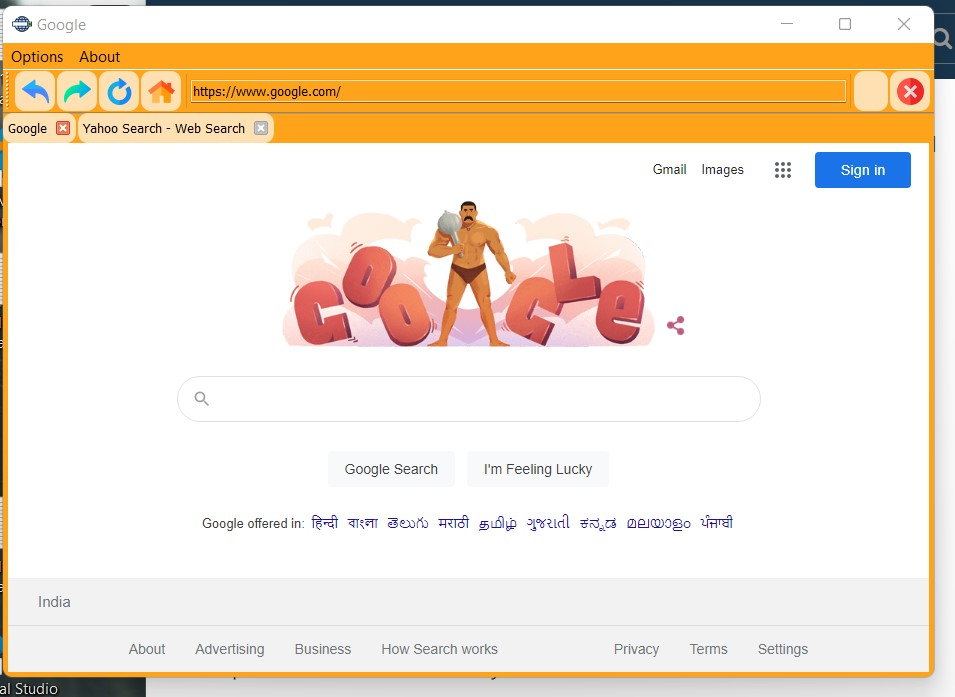

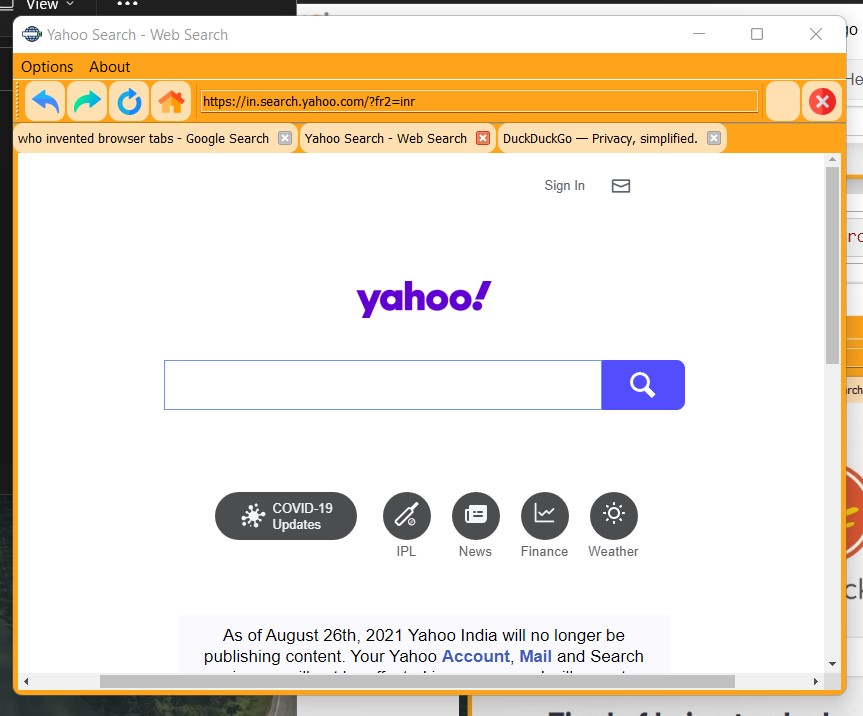

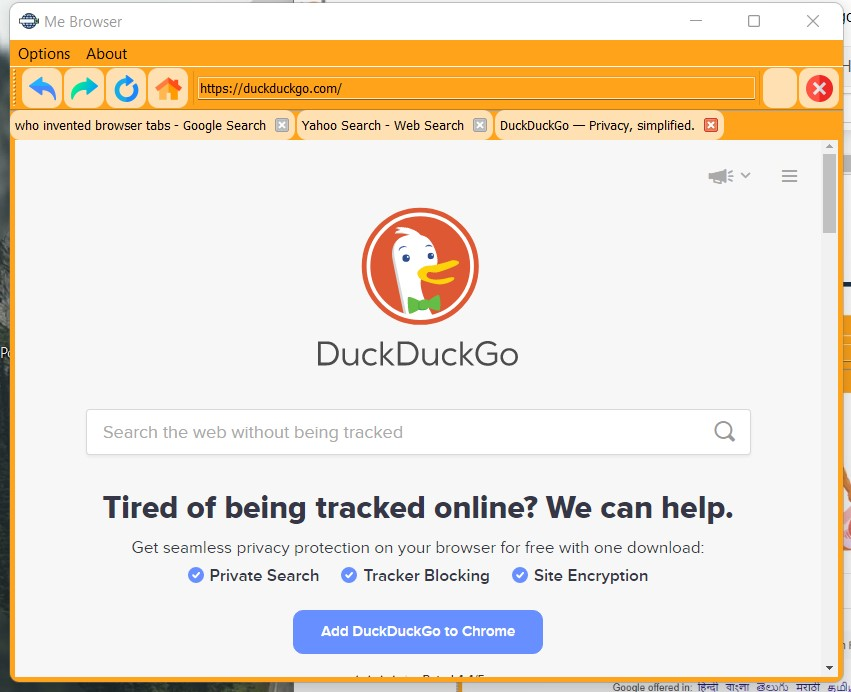

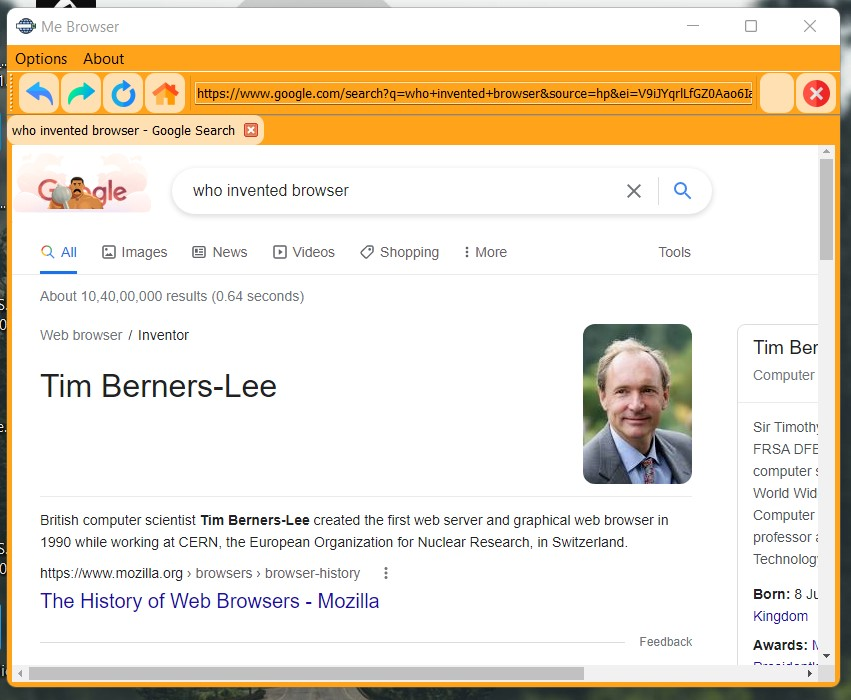

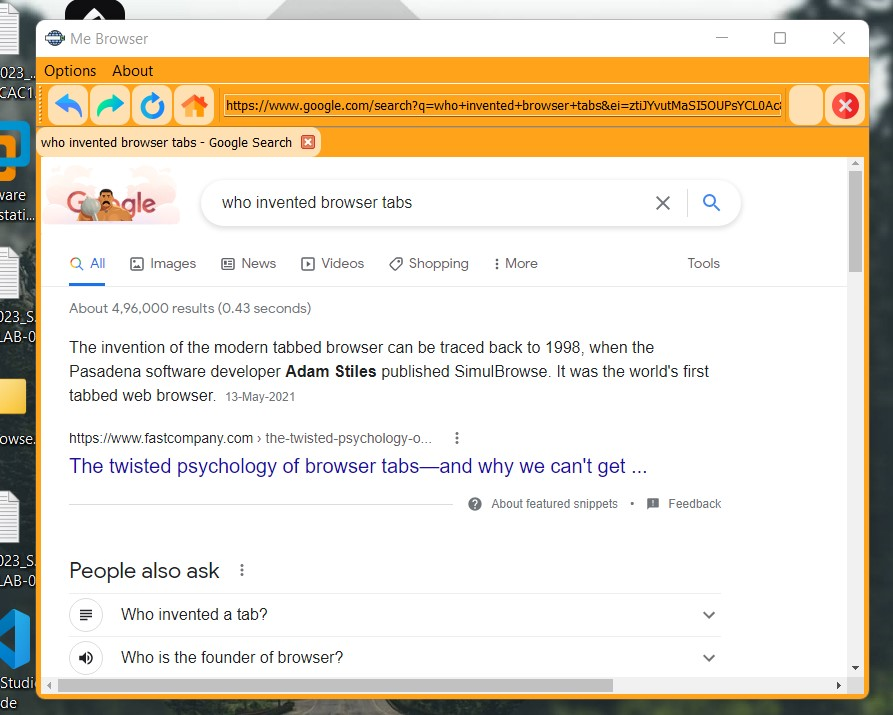

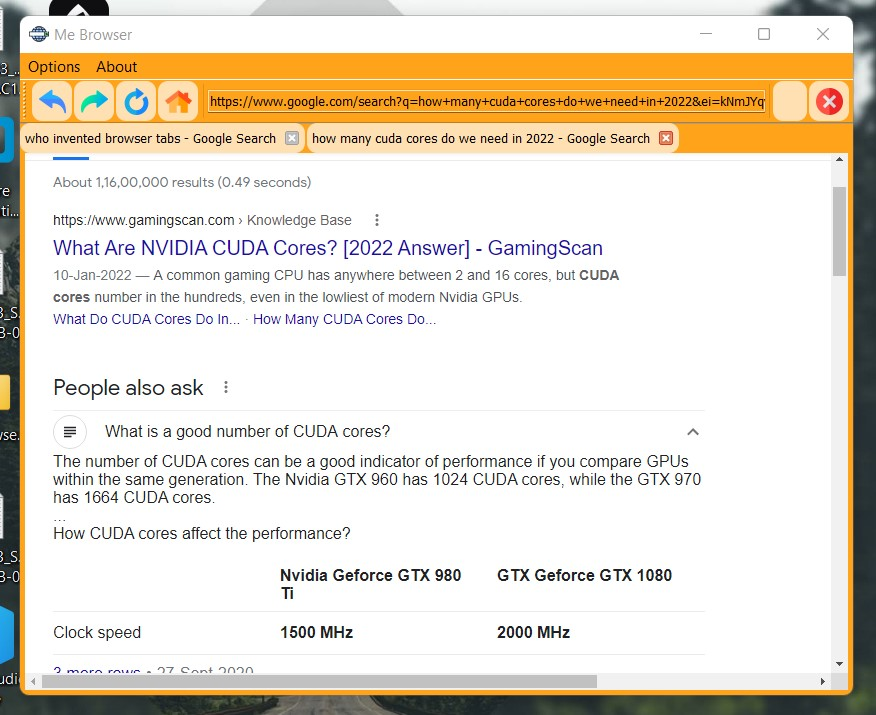

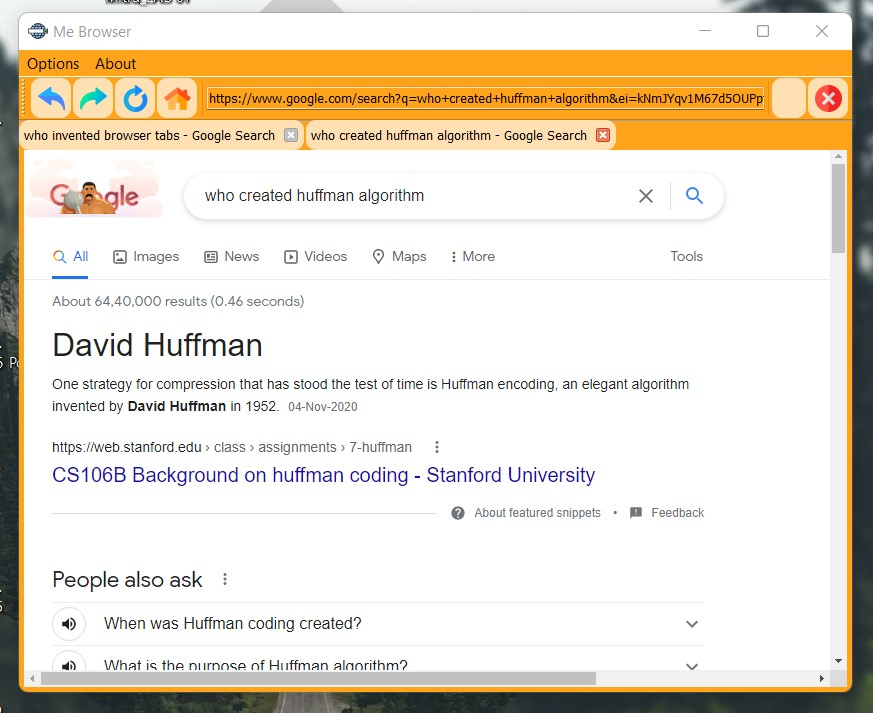